# Notebook description

The dataset represents retail transactional data. It contains information about customers, their purchases, products, and transaction details. The data includes various attributes such as customer ID, name, email, phone, address, city, state, zipcode, country, age, gender, income, customer segment, last purchase date, total purchases, amount spent, product category, product brand, product type, feedback, shipping method, payment method, and order status.


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from ydata_profiling import ProfileReport 
import sweetviz as sv
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

# Loading Data

In [2]:
retail_df = pd.read_csv('new_retail_data.csv')

In [3]:
df = retail_df.copy()

In [4]:
df.shape

(302010, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [6]:
df.isnull().sum()

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

# Data Cleaning

In [7]:
# #rename the columns
df.columns = df.columns.str.lower()

In [8]:
df.describe()

,transaction_id,customer_id,phone,zipcode,age,year,total_purchases,amount,total_amount,ratings
count,3.016770e+05,301702.000000,3.016480e+05,301670.000000,301837.000000,301660.000000,301649.000000,301653.000000,301660.000000,301826.000000
mean,5.495823e+06,55006.553934,5.501464e+09,50298.951019,35.481326,2023.165113,5.359729,255.163659,1367.651156,3.162670
std,2.595565e+06,26005.675200,2.596017e+09,28972.807134,15.021933,0.371283,2.868575,141.389640,1128.998515,1.320827
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.000000,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,3.247930e+06,32469.250000,3.255061e+09,25425.000000,22.000000,2023.000000,3.000000,132.890764,438.724278,2.000000
50%,5.499657e+06,55012.000000,5.505812e+09,50602.500000,32.000000,2023.000000,5.000000,255.470969,1041.117547,3.000000
75%,7.739509e+06,77511.000000,7.749860e+09,75252.000000,46.000000,2023.000000,8.000000,377.672606,2029.999853,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024.000000,10.000000,499.997911,4999.625796,5.000000


In [9]:
df.head()

,transaction_id,customer_id,name,email,phone,address,city,state,zipcode,country,age,gender,income,customer_segment,date,year,month,time,total_purchases,amount,total_amount,product_category,product_brand,product_type,feedback,shipping_method,payment_method,order_status,ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,Male,Low,Regular,4/26/2023,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56.0,Male,High,Premium,5/8/2023,2023.0,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,22.0,Male,Low,Premium,1/10/2024,2024.0,January,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


## Dealing with null values in the transaction_id column

In [10]:
null_transaction_id = df[df['transaction_id'].isnull()]
null_transaction_id.head()

,transaction_id,customer_id,name,email,phone,address,city,state,zipcode,country,age,gender,income,customer_segment,date,year,month,time,total_purchases,amount,total_amount,product_category,product_brand,product_type,feedback,shipping_method,payment_method,order_status,ratings,products
1609,NaN,21179.0,Brett Bailey,Maxwell26@gmail.com,2.208751e+09,9755 Wang River Apt. 016,Portsmouth,England,84040.0,UK,21.0,Female,High,Regular,8/17/2023,2023.0,August,14:22:08,7.0,409.712413,2867.986888,Electronics,Apple,Smartphone,Good,Standard,PayPal,Pending,4.0,Motorola Moto
2003,NaN,99112.0,Angela Jones,Scott14@gmail.com,3.860774e+09,5287 Harris Junctions Suite 995,Portsmouth,England,35356.0,UK,21.0,Male,Medium,Regular,2/7/2024,2024.0,February,16:50:24,5.0,311.496410,1557.482050,Books,HarperCollins,Thriller,Bad,Same-Day,Debit Card,Pending,1.0,Psychological thriller
2202,NaN,68894.0,Yvonne Huerta,Peter51@gmail.com,4.987322e+09,10237 Deborah Pass Suite 259,Portsmouth,England,13681.0,UK,21.0,Female,Medium,Regular,2/1/2024,2024.0,February,4:22:01,2.0,49.083412,98.166823,Home Decor,IKEA,Lighting,Bad,Standard,Cash,Shipped,1.0,Track lighting
3059,NaN,42747.0,Daniel Smith,Ashley88@gmail.com,8.582474e+09,64688 Walters Ford Suite 079,Portsmouth,England,50429.0,UK,21.0,Female,Medium,Regular,8/6/2023,2023.0,August,7:14:12,2.0,303.955838,607.911677,Grocery,Pepsi,Water,Bad,Express,Credit Card,Pending,1.0,Artesian water
3213,NaN,52484.0,Joseph Clarke,Rodney77@gmail.com,2.865820e+09,0035 Joan Drives,Portsmouth,England,88391.0,UK,21.0,Female,Medium,Regular,3/15/2023,2023.0,March,15:44:18,4.0,58.073853,232.295411,Grocery,Coca-Cola,Juice,Bad,Same-Day,Debit Card,Pending,1.0,Grapefruit juice


In [11]:
# Replace the null values in the transaction_id with random unique IDs
# Create a random generator object
rng = np.random.default_rng(seed=42)  # Use a seed for reproducibility

# Identify the number of null values
num_nulls = df['transaction_id'].isnull().sum()

# Generate a set of unique 7-digit random integers
existing_ids = set(df['transaction_id'].dropna().astype(int))
new_ids = set()
while len(new_ids) < num_nulls:
    new_id = rng.integers(1000000, 9999999)  # Generate 7-digit IDs as integers
    if new_id not in existing_ids and new_id not in new_ids:  # Ensure uniqueness
        new_ids.add(new_id)

# Fill the null values with the new unique IDs
df.loc[df['transaction_id'].isnull(), 'transaction_id'] = list(new_ids)

In [12]:
df['transaction_id'].isnull().sum()

0

In [13]:
# Convert the column to integer type 
df['transaction_id'] = df['transaction_id'].astype('Int64')  

## Dealing with null values in the customer_id column

In [14]:
null_customer_id = df[df['customer_id'].isnull()]
null_customer_id.head()

,transaction_id,customer_id,name,email,phone,address,city,state,zipcode,country,age,gender,income,customer_segment,date,year,month,time,total_purchases,amount,total_amount,product_category,product_brand,product_type,feedback,shipping_method,payment_method,order_status,ratings,products
1309,9076126,NaN,Kara Harris DDS,Yvette79@gmail.com,7.246837e+09,8226 David Lakes,Portsmouth,England,68085.0,UK,21.0,Female,High,Regular,9/18/2023,2023.0,September,1:03:08,4.0,450.970112,1803.880449,Home Decor,Bed Bath & Beyond,Kitchen,Average,Same-Day,Debit Card,Delivered,2.0,Microwave
2069,1125458,NaN,Kimberly Summers,James24@gmail.com,2.432282e+09,0887 Goodwin Dale Apt. 043,Portsmouth,England,44430.0,UK,21.0,Male,Medium,Regular,6/10/2023,2023.0,June,19:17:31,5.0,421.381339,2106.906696,Grocery,Nestle,Chocolate,Good,Express,Credit Card,Delivered,3.0,Chocolate-covered fruits
2136,6139774,NaN,Robin Fisher,Tanner80@gmail.com,9.338870e+09,5723 Rojas Viaduct,Portsmouth,England,58549.0,UK,21.0,Male,Medium,Regular,3/5/2023,2023.0,March,10:09:01,7.0,409.750458,2868.253204,Home Decor,Bed Bath & Beyond,Bathroom,Average,Standard,Credit Card,Pending,2.0,Sink
2269,5157785,NaN,Alexander Stark,Tabitha81@gmail.com,4.236126e+09,27403 Bennett Inlet,Portsmouth,England,4229.0,UK,21.0,Male,Medium,Regular,1/25/2024,2024.0,January,20:39:09,1.0,273.750191,273.750191,Grocery,Nestle,Coffee,Excellent,Express,Debit Card,Pending,4.0,Americano
2396,9668849,NaN,Diana Sawyer,Alex49@gmail.com,9.955699e+09,15739 Courtney Drives Apt. 939,Portsmouth,England,77383.0,UK,21.0,Female,Medium,Regular,2/14/2024,2024.0,February,14:42:32,9.0,336.629078,3029.661699,Electronics,Apple,Tablet,Average,Same-Day,Cash,Delivered,2.0,Acer Iconia Tab


In [15]:
# Replace the null values in the customer_id with random unique IDs
# Convert the column to integer type 
df['customer_id'] = df['customer_id'].astype('Int64') 
# Create a random generator object
rng = np.random.default_rng(seed=42)  # Use a seed for reproducibility

# Identify the number of null values
num_customerid_nulls = df['customer_id'].isnull().sum()

# Generate a set of unique 7-digit random integers
existing_customer_ids = set(df['customer_id'].dropna().astype(int))  # Ensure IDs are treated as strings
new_customer_ids = set()
while len(new_customer_ids) < num_customerid_nulls:
    new_customer_id = str(np.random.randint(10000, 99999))  # Generate 5-digit IDs
    if new_customer_id not in existing_customer_ids and new_customer_id not in new_customer_ids:  # Ensure uniqueness
        new_customer_ids.add(new_customer_id)

# Fill the null values with the new unique IDs
df.loc[df['customer_id'].isnull(), 'customer_id'] = list(new_customer_ids)


In [16]:
df['customer_id'].isnull().sum()

0

## Dealing with null values in the name, phone, email, address, zipcode column

In [17]:
null_names= df[df['name'].isnull()]
null_names.head()

,transaction_id,customer_id,name,email,phone,address,city,state,zipcode,country,age,gender,income,customer_segment,date,year,month,time,total_purchases,amount,total_amount,product_category,product_brand,product_type,feedback,shipping_method,payment_method,order_status,ratings,products
3449,3123103,45940,NaN,Natalie62@gmail.com,7.059169e+09,257 Nicholas Roads Apt. 801,Portsmouth,England,81481.0,UK,21.0,Male,Medium,Regular,2/13/2024,2024.0,February,2:01:32,3.0,311.643827,934.931481,Electronics,Apple,Tablet,Bad,Express,Credit Card,Delivered,1.0,Asus ZenPad
3577,9396347,24702,NaN,Ashley53@gmail.com,3.172745e+09,37738 Andrew Lane,Portsmouth,England,85759.0,UK,21.0,Female,Medium,Regular,7/29/2023,2023.0,July,2:20:16,5.0,301.995126,1509.975630,Electronics,Apple,Laptop,Bad,Express,Cash,Pending,1.0,Acer Swift
4315,9299705,15811,NaN,Brad10@gmail.com,5.997109e+09,424 Greg Passage Suite 762,Portsmouth,England,5068.0,UK,24.0,Male,Medium,Regular,8/29/2023,2023.0,August,0:34:52,1.0,72.059940,72.059940,Electronics,Apple,Smartphone,Excellent,Same-Day,PayPal,Shipped,4.0,iPhone
4608,8949630,67800,NaN,Tonya22@gmail.com,3.640584e+09,5981 Daniel Spur Apt. 152,Portsmouth,England,58127.0,UK,24.0,Female,Medium,Regular,4/28/2023,2023.0,April,14:02:42,9.0,209.016063,1881.144565,Electronics,Samsung,Television,Average,Same-Day,PayPal,Processing,2.0,Plasma TV
6208,8262159,31297,NaN,Janice34@gmail.com,2.557521e+09,1512 Colin Fort,Portsmouth,England,9594.0,UK,24.0,Male,Medium,Regular,10/8/2023,2023.0,October,23:43:42,6.0,76.803125,460.818748,Books,Random House,Literature,Good,Express,Debit Card,Pending,3.0,Drama


In [18]:
# drop the  columns that are private identifieable information for privacy of customer
df.drop(columns=['name', 'email', 'phone', 'address', 'zipcode'], inplace=True)

In [19]:
df.head()

,transaction_id,customer_id,city,state,country,age,gender,income,customer_segment,date,year,month,time,total_purchases,amount,total_amount,product_category,product_brand,product_type,feedback,shipping_method,payment_method,order_status,ratings,products
0,8691788,37249,Dortmund,Berlin,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773,69749,Nottingham,England,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610,30192,Geelong,New South Wales,Australia,48.0,Male,Low,Regular,4/26/2023,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460,62101,Edmonton,Ontario,Canada,56.0,Male,High,Premium,5/8/2023,2023.0,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775,27901,Bristol,England,UK,22.0,Male,Low,Premium,1/10/2024,2024.0,January,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


## Dealing with null values in the year column

In [20]:
df['year'].isnull().sum()

350

In [21]:
# replace the null values with mean
year_mean = df['year'].mean().round(0)

df['year'] = df['year'].fillna(year_mean)

In [22]:
df['year'].isnull().sum()

0

In [23]:
# converting year column into integer
df['year'] = df['year'].astype('Int64') 
df.head()

,transaction_id,customer_id,city,state,country,age,gender,income,customer_segment,date,year,month,time,total_purchases,amount,total_amount,product_category,product_brand,product_type,feedback,shipping_method,payment_method,order_status,ratings,products
0,8691788,37249,Dortmund,Berlin,Germany,21.0,Male,Low,Regular,9/18/2023,2023,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773,69749,Nottingham,England,UK,19.0,Female,Low,Premium,12/31/2023,2023,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610,30192,Geelong,New South Wales,Australia,48.0,Male,Low,Regular,4/26/2023,2023,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460,62101,Edmonton,Ontario,Canada,56.0,Male,High,Premium,5/8/2023,2023,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775,27901,Bristol,England,UK,22.0,Male,Low,Premium,1/10/2024,2024,January,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


## Dealing with null values in the city column

In [24]:
null_city = df[df['city'].isnull()]
null_city.head()

,transaction_id,customer_id,city,state,country,age,gender,income,customer_segment,date,year,month,time,total_purchases,amount,total_amount,product_category,product_brand,product_type,feedback,shipping_method,payment_method,order_status,ratings,products
30903,5695172,65712,NaN,England,UK,22.0,Male,High,Regular,4/13/2023,2023,April,20:56:39,6.0,28.185125,169.110749,Clothing,Adidas,Jacket,Average,Standard,PayPal,Delivered,2.0,Peacoat
34227,2344287,35757,NaN,North Carolina,USA,22.0,Female,Low,Regular,9/7/2023,2023,September,6:16:25,4.0,167.815723,671.262893,Home Decor,Home Depot,Tools,Excellent,Same-Day,PayPal,Delivered,4.0,Utility knife
36340,6311279,69037,NaN,Arkansas,USA,22.0,Male,High,Regular,3/6/2023,2023,March,3:25:55,8.0,259.063949,2072.511594,Grocery,Coca-Cola,Soft Drink,Average,Standard,PayPal,Delivered,2.0,Orange soda
36701,6364411,97562,NaN,New South Wales,Australia,22.0,Female,Low,Regular,1/29/2024,2024,January,23:41:03,6.0,397.515059,2385.090356,Books,HarperCollins,Non-Fiction,Excellent,Same-Day,Debit Card,Delivered,4.0,Psychology
38608,2001432,48237,NaN,England,UK,22.0,Male,High,Regular,5/1/2023,2023,May,3:28:14,1.0,81.243538,81.243538,Grocery,Coca-Cola,Soft Drink,Average,Standard,Debit Card,Delivered,2.0,Ginger ale


In [25]:
city_null = 'not listed'

df['city'] = df['city'].fillna(city_null)

In [26]:
df['city'].isnull().sum()

0

## Dealing with null values in the state column

In [27]:
df['state'].isnull().sum()

281

In [28]:
state_null = 'not listed'

df['state'] = df['state'].fillna(state_null)

In [29]:
df['city'].isnull().sum()

0

In [30]:
df.isnull().sum()

transaction_id        0
customer_id           0
city                  0
state                 0
country             271
age                 173
gender              317
income              290
customer_segment    215
date                359
year                  0
month               273
time                350
total_purchases     361
amount              357
total_amount        350
product_category    283
product_brand       281
product_type          0
feedback            184
shipping_method     337
payment_method      297
order_status        235
ratings             184
products              0
dtype: int64

## Dealing with null values in country column

In [31]:
df['country'].isnull().sum()

271

In [32]:
country_null = 'not listed'

df['country'] = df['country'].fillna(country_null)

# Dealing with null values in the age column

In [33]:
# calculating the mean and filling the null values with it 
age_mean = df['age'].mean().round(0)
df['age'] = df['age'].fillna(age_mean)

## Dealing with null values in the gender column

In [34]:
# calculating the mode and filling the null values with it
gender_mode = df['gender'].mode()
gender_mode

0    Male
Name: gender, dtype: object

In [35]:
df['gender'] = df['gender'].fillna('Male')

## Dealing with null values in the income column

In [36]:
# calculating the most frequent income 
mode_income = df['income'].mode()
mode_income

0    Medium
Name: income, dtype: object

In [37]:
df['income'] = df['income'].fillna('Medium')

## Dealing with null values in the customer segment

In [38]:
# calculating the most frequent customer segment
mode_seg = df['customer_segment'].mode()
mode_seg

0    Regular
Name: customer_segment, dtype: object

In [39]:
df['customer_segment'] = df['customer_segment'].fillna('Regular')

## Dealing with null values in the date column

In [40]:
df['date'].mode()

0    11/22/2023
Name: date, dtype: object

In [41]:
df['date'] = df['date'].fillna('11/22/2023')

## Dealing with null values in the month column

In [42]:
df['month'].mode()

0    April
Name: month, dtype: object

In [43]:
df['month'] = df['month'].fillna('April')

## Dealing with null values in the time column

In [44]:
df['time'].mode()

0    15:54:27
1     2:16:01
2     2:55:36
3     7:45:07
Name: time, dtype: object

In [45]:
df['time'] = df['time'].fillna('15:54:27')

## Dealing with null values in the total purchases column

In [46]:
total_purchases_mean = df['total_purchases'].mean().round(0)

In [47]:
df['total_purchases'] = df['total_purchases'].fillna(total_purchases_mean)

## Dealing with null values in the amount and total amount column

In [48]:
average_amount =  df['amount'].mean().round(2)
df['amount'] = df['amount'].fillna(average_amount)

In [49]:
average_total_amount =  df['total_amount'].mean().round(2)
df['total_amount'] = df['total_amount'].fillna(average_total_amount)

## Dealing with null values in the product category

In [50]:
df['product_category'].mode()

0    Electronics
Name: product_category, dtype: object

In [51]:
df['product_category'] = df['product_category'].fillna('Electronics')

## Dealing with null values in the product brand

In [52]:
df['product_brand'].mode()

0    Pepsi
Name: product_brand, dtype: object

In [53]:
df['product_brand'] = df['product_brand'].fillna('Pepsi')

## Dealing with null values in the feedback column

In [54]:
df['feedback'].mode()

0    Excellent
Name: feedback, dtype: object

In [55]:
df['feedback'] = df['feedback'].fillna('Excellent')

## Dealing with null values in the shipping method column

In [56]:
df['shipping_method'].mode()

0    Same-Day
Name: shipping_method, dtype: object

In [57]:
df['shipping_method'] = df['shipping_method'].fillna('Same-Day')

## Dealing with null values in the payment method column

In [58]:
df['payment_method'].mode()

0    Credit Card
Name: payment_method, dtype: object

In [59]:
df['payment_method'] = df['payment_method'].fillna('Credit Card')

## Dealing with null values in the order status

In [60]:
df['order_status'].mode()

0    Delivered
Name: order_status, dtype: object

In [61]:
df['order_status'] = df['order_status'].fillna('Delivered')

## Dealing with null values in the ratings column

In [62]:
mean_ratings = df['ratings'].mean().round(0)
mean_ratings

3.0

In [63]:
df['ratings'] = df['ratings'].fillna(mean_ratings)

## Converting datatypes of numerical categories to integer

In [64]:
df.dtypes

transaction_id        Int64
customer_id           Int64
city                 object
state                object
country              object
age                 float64
gender               object
income               object
customer_segment     object
date                 object
year                  Int64
month                object
time                 object
total_purchases     float64
amount              float64
total_amount        float64
product_category     object
product_brand        object
product_type         object
feedback             object
shipping_method      object
payment_method       object
order_status         object
ratings             float64
products             object
dtype: object

In [65]:
df['age'] = df['age'].round().astype(int)
df['total_purchases'] = df['total_purchases'].round(2).astype(int)
df['amount'] =  df['amount'].round(2)
df['total_amount'] = df['total_amount'].round(2)
df['ratings'] = df['ratings'].round().astype(int)

## Convert time and date columns to datetime format

In [66]:
#converting date , year ,time into datetime datatype formate

df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
df['time'] = pd.to_datetime(df['time']).dt.strftime('%H:%M:%S')

/tmp/ipykernel_20937/4067300177.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time']).dt.strftime('%H:%M:%S')


## Rename the city column that have inaccurate values

In [67]:
# Replace incorrect city names

df['city'] = df['city'].str.replace("MÃ¼nster", "Münster")
df['city'] = df['city'].str.replace("St. John's", "St. Johns")
df['city'] = df['city'].str.replace("DÃ¼sseldorf", "Düsseldorf")

## Checking for negative integers

In [68]:

negative_values = df[(df['total_purchases'] < 0) | 
                     (df['amount'] < 0) | 
                     (df['total_amount'] < 0)]

negative_values

,transaction_id,customer_id,city,state,country,age,gender,income,customer_segment,date,year,month,time,total_purchases,amount,total_amount,product_category,product_brand,product_type,feedback,shipping_method,payment_method,order_status,ratings,products


## Checking and dealing with duplicates

In [69]:
df.duplicated().sum()

4

In [70]:
df[df.duplicated()].head()

,transaction_id,customer_id,city,state,country,age,gender,income,customer_segment,date,year,month,time,total_purchases,amount,total_amount,product_category,product_brand,product_type,feedback,shipping_method,payment_method,order_status,ratings,products
299759,4476510,20103,Kitchener,Ontario,Canada,54,Female,Low,Regular,2023-12-10,2023,December,01:09:09,7,134.37,940.62,Clothing,Adidas,T-shirt,Bad,Express,Credit Card,Processing,1,Off-the-shoulder tee
301094,5340129,29920,Wollongong,New South Wales,Australia,54,Male,Low,New,2023-12-19,2023,December,11:33:48,6,255.16,2201.57,Grocery,Pepsi,Soft Drink,Excellent,Express,Cash,Delivered,4,Fruit punch
301362,4942326,25416,Leicester,England,UK,63,Male,Low,Regular,2023-05-05,2023,May,04:17:21,8,191.91,1535.26,Clothing,Adidas,Jacket,Average,Same-Day,Cash,Pending,2,Varsity jacket
301486,3200766,49598,Bremen,Berlin,Germany,59,Male,Low,New,2023-11-23,2023,November,15:35:49,9,272.33,2450.95,Grocery,Pepsi,Soft Drink,Bad,Standard,Cash,Pending,1,Iced tea


In [71]:
df.isnull().sum()

transaction_id      0
customer_id         0
city                0
state               0
country             0
age                 0
gender              0
income              0
customer_segment    0
date                0
year                0
month               0
time                0
total_purchases     0
amount              0
total_amount        0
product_category    0
product_brand       0
product_type        0
feedback            0
shipping_method     0
payment_method      0
order_status        0
ratings             0
products            0
dtype: int64

In [72]:
# Save the DataFrame as a CSV file
#df.to_csv('cleaned_retail_data.csv', index=False)

# Data Exploration

## Customer Demographics:

1. What are the primary age groups, genders, and locations of our customers?

2. What is the average income level of our customer base?

3. Are certain demographic segments more likely to make high-value purchases?

## 1. Age and gender distribution

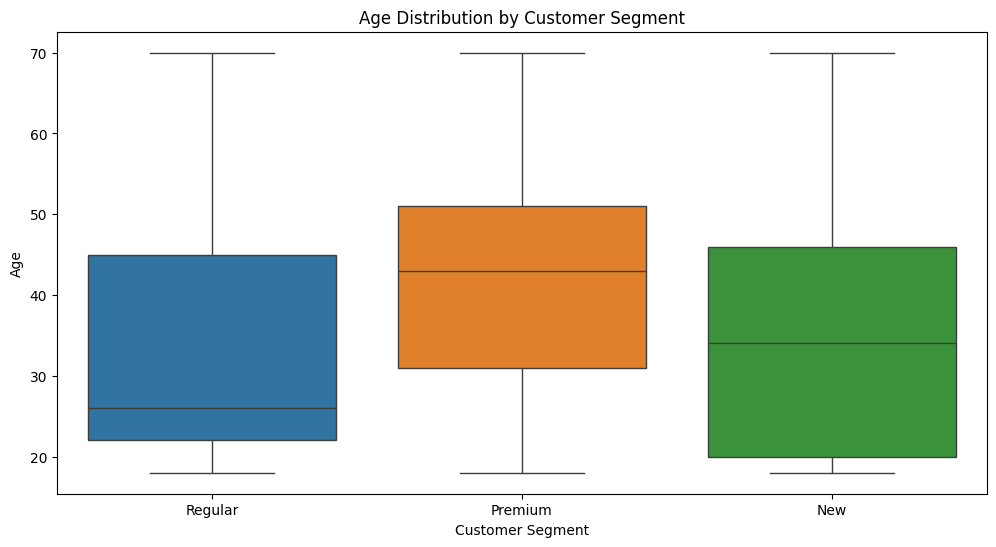

In [73]:
# Create a box plot for age distribution by customer segment
plt.figure(figsize=(12, 6))
sns.boxplot(x='customer_segment', y='age', data=df, hue='customer_segment', legend=False)
plt.title('Age Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Age')
plt.show()

The box plot shows that for the Regular customers lie between the mid 20s to mid 40s. The median 

### Customer gender distribution 

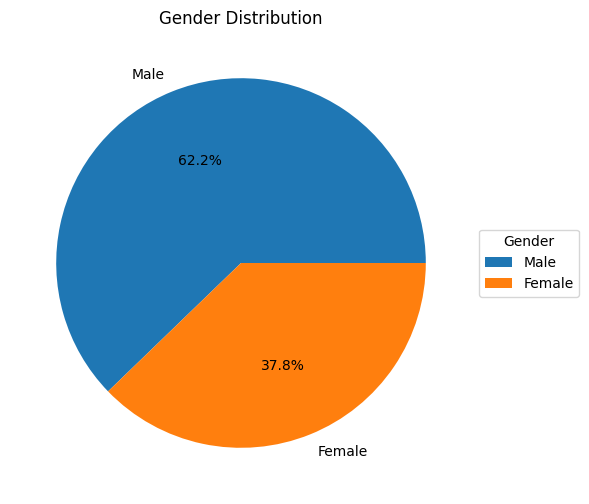

In [74]:

# Get the number of occurrences for each gender
gender_counts = df['gender'].value_counts()

# Create a pie chart for gender distribution
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.legend(labels=gender_counts.index, title="Gender", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

### Customer location distribution

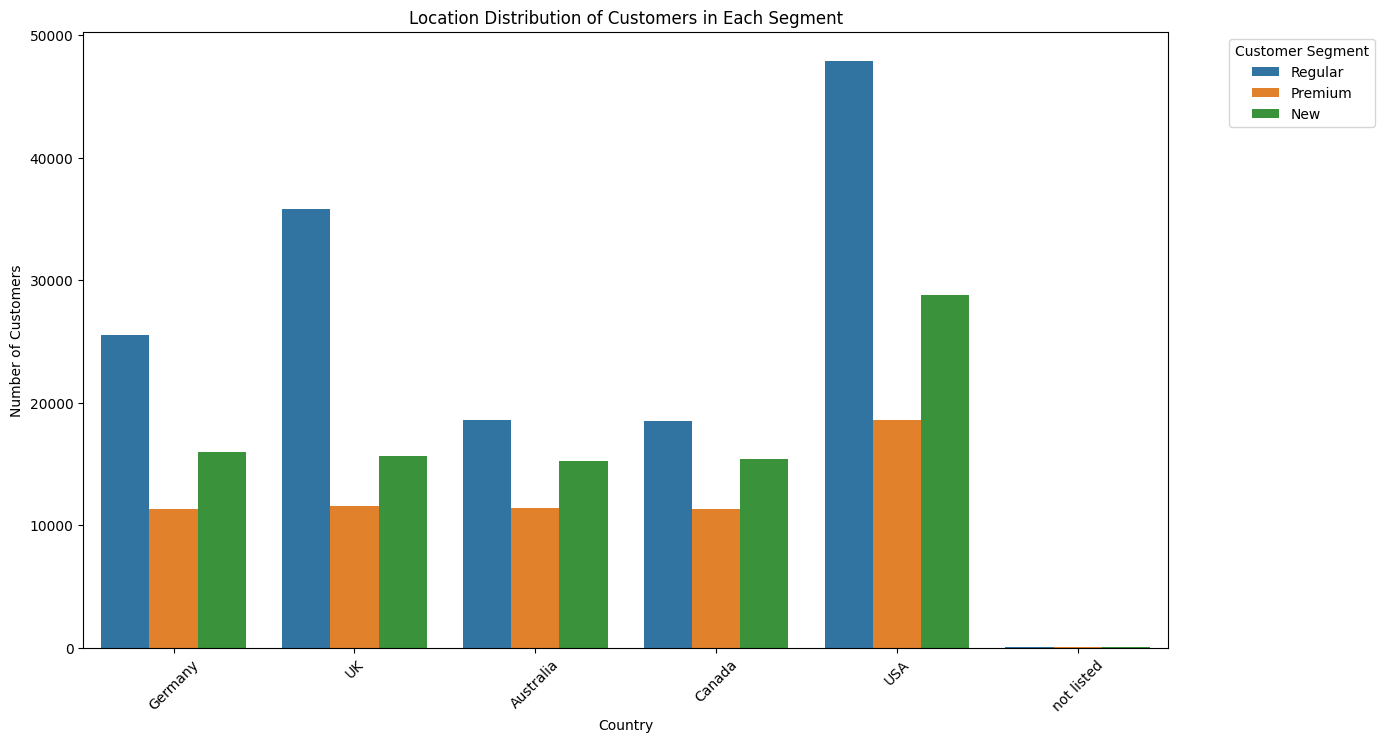

In [75]:
plt.figure(figsize=(14, 8))

# Create a count plot showing the distribution of customers by location in each customer segment
sns.countplot(x='country', hue='customer_segment', data=df)

# Add title and labels
plt.title('Location Distribution of Customers in Each Segment')
plt.xlabel('Country')  # Replace 'City' with 'State' or 'Country' if needed
plt.ylabel('Number of Customers')

# Rotate x-axis labels if there are many locations
plt.xticks(rotation=45)
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 2. Income Level of the Customer Base

In [80]:
# Group by customer segment and income level to get the count of each combination
income_segment_count = df.groupby(['customer_segment', 'income']).size().reset_index(name='count')

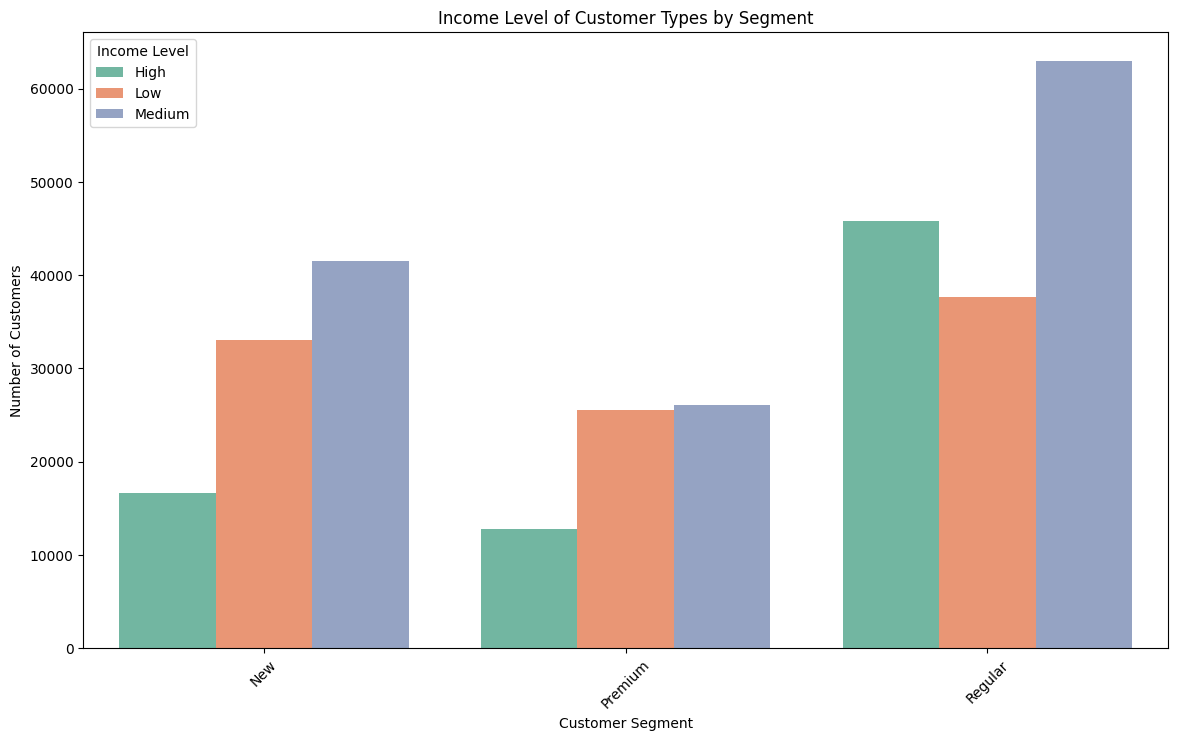

In [81]:
plt.figure(figsize=(14, 8))
sns.barplot(x='customer_segment', y='count', hue='income', data=income_segment_count, palette='Set2')

# Add title and labels
plt.title('Income Level of Customer Types by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Income Level')
plt.show()

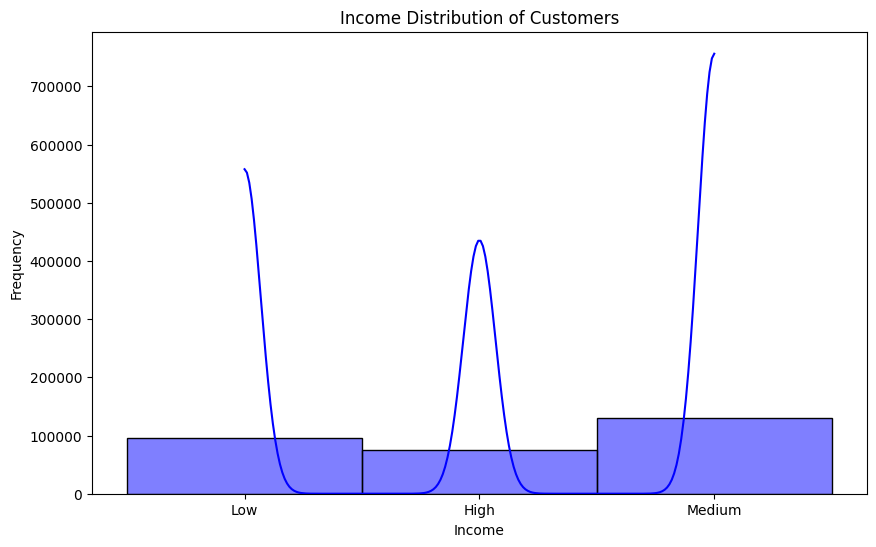

In [76]:
# a histogram to show the distribution of customer income
plt.figure(figsize=(10, 6))
sns.histplot(df['income'], bins=20, kde=True, color='blue')
plt.title('Income Distribution of Customers')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# 3.Determing if there is high level purchases